# The SIN tests
Here we use MUTIS to analyze the correlations between simple functions, as a method for veryfing the correct functioning of MUTIS.

In [1]:
# I'm doing a lot of changes to MUTIS while writting this, better reload automatically.
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import scipy as sp

import matplotlib as mplt
import matplotlib.pyplot as plt

import mutis

from numpy import pi as pi

def vertlines(x0,a,b,s):
    for x in (x0+s*np.arange(a,b)):
        ax.axvline(x=x, ymin=-1,ymax=+1, color='m', linewidth=3, alpha=0.5)

## 1. Sinusoidal functions

In [3]:
# Build signal 1
t1_o = np.linspace(2,6,40)
s1_o = np.sin(t1_o)

msk1 = np.random.randn(t1_o.size) > 0.6

t1_s = t1_o[msk1]
s1_s = s1_o[msk1]

In [4]:
# Build signal 2
t2_o = np.linspace(8,12,40)
s2_o = np.sin(t2_o)

msk2 = np.random.randn(t2_o.size) > 0.6

t2_s = t2_o[msk2]
s2_s = s2_o[msk2]

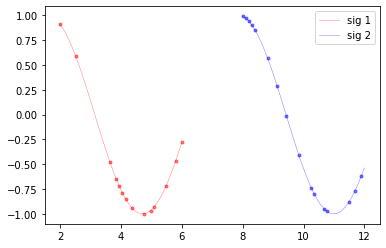

In [5]:
plt.figure()
plt.plot(t1_o,s1_o,'r-', lw=0.5, alpha=0.5, label='sig 1')
plt.plot(t1_s,s1_s,'r.', alpha=0.5)
plt.plot(t2_o,s2_o,'b-', lw=0.5, alpha=0.5, label='sig 2')
plt.plot(t2_s,s2_s,'b.', alpha=0.5)
plt.legend()
plt.show()

From this singals we would expect a maximum at 11-5=6, and several max and mins at distances of pi from this.

In [6]:
sig1_o = mutis.Signal(t1_o, s1_o, 'lc_gen_psd')
sig2_o = mutis.Signal(t2_o, s2_o, 'lc_gen_psd')
corr_o = mutis.Correlation(sig1_o,sig2_o,'welsh_ab')

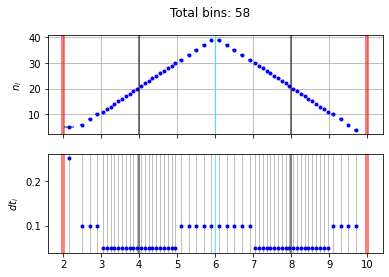

In [7]:
corr_o.gen_times(dt0=0.1, ndtmax=3, nbinsmin=3)
corr_o.plot_times(rug=True)

/Users/juan/miniconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 256 is greater than input length  = 40, using nperseg = 40
  warnings.warn('nperseg = {0:d} is greater than input length '
<ipython-input-8-d2f830bfdeec>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


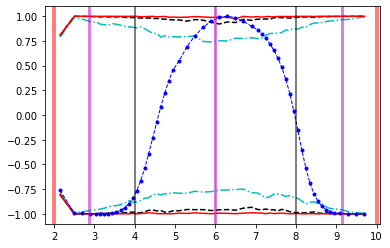

In [8]:
corr_o.gen_synth(400)
corr_o.gen_corr()
fig, ax = plt.subplots()
corr_o.plot_corr()
vertlines(6,-1,2, pi)
fig.show()

Indeed the correlation with the origina signals shows the expected peaks in their positions (the vertical red lines)

In [9]:
sig1_s = mutis.Signal(t1_s, s1_s, 'lc_gen_psd')
sig2_s = mutis.Signal(t2_s, s2_s, 'lc_gen_psd')
corr_s = mutis.Correlation(sig1_s,sig2_s,'welsh_ab')

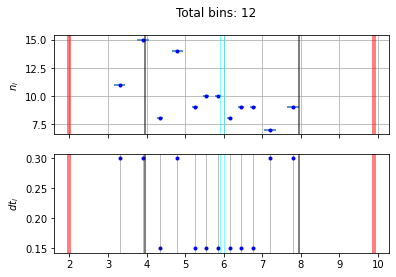

In [10]:
corr_s.gen_times(dt0=0.3, ndtmax=4, nbinsmin=5)
corr_s.plot_times(rug=True)

/Users/juan/miniconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 256 is greater than input length  = 14, using nperseg = 14
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/juan/miniconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 256 is greater than input length  = 16, using nperseg = 16
  warnings.warn('nperseg = {0:d} is greater than input length '
<ipython-input-11-7204bb7078d0>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


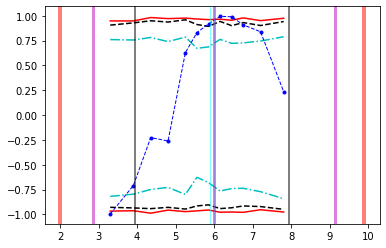

In [11]:
corr_s.gen_synth(400)
corr_s.gen_corr()
fig, ax = plt.subplots()
corr_s.plot_corr()

vertlines(6,-1,2,pi)

fig.show()

However, the correlation with the sampled signals shows only the central maximum and one of the minima, both with some uncertainy.

We can also repeat but using **numpy's correlation function with interpolated signals**. The procedure is the same but times are manually sets as follows.

In [12]:
sig1_s = mutis.Signal(t1_s, s1_s, 'lc_gen_psd')
sig2_s = mutis.Signal(t2_s, s2_s, 'lc_gen_psd')
corr_s = mutis.Correlation(sig1_s,sig2_s,'numpy')

In [13]:
corr_s.gen_times()

/Users/juan/miniconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 256 is greater than input length  = 14, using nperseg = 14
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/juan/miniconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 256 is greater than input length  = 16, using nperseg = 16
  warnings.warn('nperseg = {0:d} is greater than input length '
<ipython-input-14-57146e53f44d>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


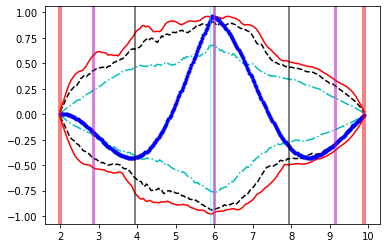

In [14]:
corr_s.gen_synth(400)
corr_s.gen_corr()
fig, ax = plt.subplots()
corr_s.plot_corr()
vertlines(6,-1,2, pi)
fig.show()

## 2. Pulse functions

In [15]:
# Build signal 1
t1_o = np.linspace(2,6,80)
s1_o = np.exp(-0.8*(t1_o-4)**2)

msk1 = np.random.randn(t1_o.size) > 0.6

t1_s = t1_o[msk1]
s1_s = s1_o[msk1]

In [16]:
# Build signal 2
t2_o = np.linspace(8,12,80)
s2_o = np.exp(-0.8*(t2_o-9)**2)

msk2 = np.random.randn(t2_o.size) > 0.5

t2_s = t2_o[msk2]
s2_s = s2_o[msk2]

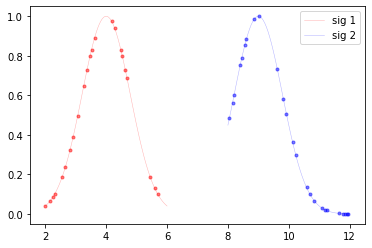

In [17]:
plt.figure()
plt.plot(t1_o,s1_o,'r-', lw=0.5, alpha=0.3, label='sig 1')
plt.plot(t1_s,s1_s,'r.', alpha=0.5)
plt.plot(t2_o,s2_o,'b-', lw=0.5, alpha=0.3, label='sig 2')
plt.plot(t2_s,s2_s,'b.', alpha=0.5)
plt.legend()
plt.show()

From these signals we would expect a strong maximum at 5 with close minima.

In [18]:
sig1_o = mutis.Signal(t1_o, s1_o, 'lc_gen_psd')
sig2_o = mutis.Signal(t2_o, s2_o, 'lc_gen_psd')
corr_o = mutis.Correlation(sig1_o,sig2_o,'welsh_ab')

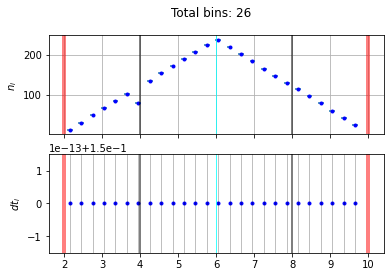

In [19]:
corr_o.gen_times(dt0=0.3, ndtmax=2, nbinsmin=5)
corr_o.plot_times(rug=True)

/Users/juan/miniconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 256 is greater than input length  = 80, using nperseg = 80
  warnings.warn('nperseg = {0:d} is greater than input length '
<ipython-input-20-216caaef2c82>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


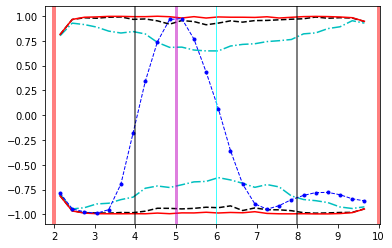

In [20]:
corr_o.gen_synth(400)
corr_o.gen_corr()

fig, ax = plt.subplots()
corr_o.plot_corr()
vertlines(5,0,1,0)
fig.show()

Which is what was expected.

In [21]:
sig1_s = mutis.Signal(t1_s, s1_s, 'lc_gen_psd')
sig2_s = mutis.Signal(t2_s, s2_s, 'lc_gen_psd')
corr_s = mutis.Correlation(sig1_s,sig2_s,'welsh_ab')

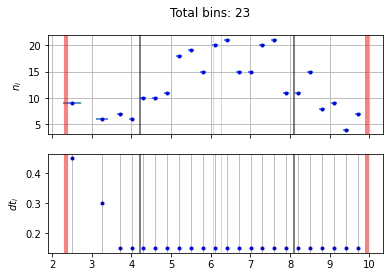

In [22]:
corr_s.gen_times(dt0=0.3, ndtmax=2, nbinsmin=3)
corr_s.plot_times(rug=True)

/Users/juan/miniconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 256 is greater than input length  = 23, using nperseg = 23
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/juan/miniconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 256 is greater than input length  = 25, using nperseg = 25
  warnings.warn('nperseg = {0:d} is greater than input length '
<ipython-input-23-fea7c1831429>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


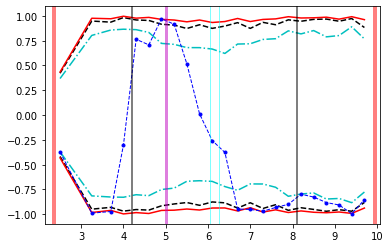

In [23]:
corr_s.gen_synth(400)
corr_s.gen_corr()
fig, ax = plt.subplots()
corr_s.plot_corr()
vertlines(5,0,1,0)
fig.show()

Which is as expected, but uglier.

We can also repeat but using **numpy's correlation function with interpolated signals**. The procedure is the same but times are manually sets as follows.

In [24]:
sig1_s = mutis.Signal(t1_s, s1_s, 'lc_gen_psd')
sig2_s = mutis.Signal(t2_s, s2_s, 'lc_gen_psd')
corr_s = mutis.Correlation(sig1_s,sig2_s,'numpy')

In [25]:
corr_s.gen_times()

/Users/juan/miniconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 256 is greater than input length  = 23, using nperseg = 23
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/juan/miniconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 256 is greater than input length  = 25, using nperseg = 25
  warnings.warn('nperseg = {0:d} is greater than input length '
<ipython-input-26-fea7c1831429>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


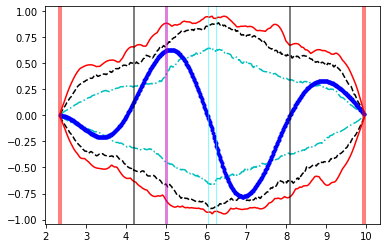

In [26]:
corr_s.gen_synth(400)
corr_s.gen_corr()
fig, ax = plt.subplots()
corr_s.plot_corr()
vertlines(5,0,1,0)
fig.show()

## 3. Several pulses, with error

In [27]:
# Build signal 1
t1_o = np.linspace(2,16,35)
s1_o = np.exp(-1.8*(t1_o-4)**2) + np.exp(-1.8*(t1_o-12)**2) + 0.01

msk1 = np.random.rand(t1_o.size) < 1.5*(s1_o+0.1)

t1_s = t1_o[msk1]
s1_s = s1_o[msk1]

# ... and add error:
t1_s = t1_s + 0.01*np.random.randn(t1_s.size)
s1_s = s1_s + 0.3*s1_s*np.random.randn(s1_s.size)  + 0.05*np.random.rand(s1_s.size)

In [28]:
# Build signal 2
t2_o = np.linspace(7,23,50)
s2_o = np.exp(-1.8*(t2_o-12)**2) + np.exp(-1.8*(t2_o-20)**2) + 0.01

msk2 = np.random.rand(t2_o.size) < 1.5*(s2_o+0.1)

t2_s = t2_o[msk2]
s2_s = s2_o[msk2]

# ... and add error:
t2_s = t2_s + 0.01*np.random.randn(t2_s.size)
s2_s = s2_s + 0.3*s2_s*np.random.randn(s2_s.size) + 0.05*np.random.rand(s2_s.size)

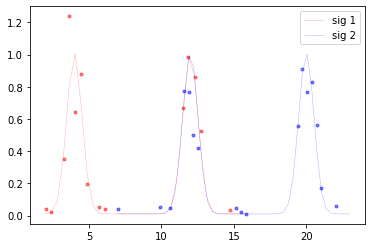

In [29]:
plt.figure()
plt.plot(t1_o,s1_o,'r-', lw=0.5, alpha=0.3, label='sig 1')
plt.plot(t1_s,s1_s,'r.', alpha=0.5)
plt.plot(t2_o,s2_o,'b-', lw=0.5, alpha=0.3, label='sig 2')
plt.plot(t2_s,s2_s,'b.', alpha=0.5)
plt.legend()
plt.show()

From these signals we would expect a strong maximum at 8 with close minima (and maybe others peaks near 16 and 0)

In [30]:
sig1_o = mutis.Signal(t1_o, s1_o, 'lc_gen_psd')
sig2_o = mutis.Signal(t2_o, s2_o, 'lc_gen_psd')
corr_o = mutis.Correlation(sig1_o,sig2_o,'welsh_ab')

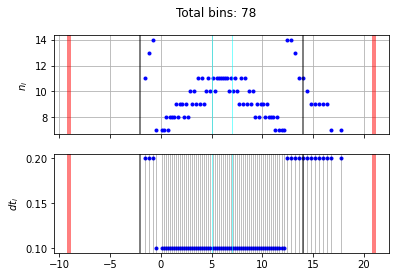

In [31]:
corr_o.gen_times(dt0=0.2, ndtmax=1, nbinsmin=6)
corr_o.plot_times(rug=True)

/Users/juan/miniconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 256 is greater than input length  = 35, using nperseg = 35
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/juan/miniconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 256 is greater than input length  = 50, using nperseg = 50
  warnings.warn('nperseg = {0:d} is greater than input length '
<ipython-input-32-baac3441084c>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


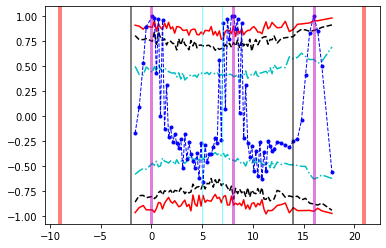

In [32]:
corr_o.gen_synth(400)
corr_o.gen_corr()

fig, ax = plt.subplots()
corr_o.plot_corr()
vertlines(8,0,1,0)
vertlines(16,0,1,0)
vertlines(0,0,1,0)
fig.show()

Which is what was expected.

In [33]:
sig1_s = mutis.Signal(t1_s, s1_s, 'lc_gen_psd')
sig2_s = mutis.Signal(t2_s, s2_s, 'lc_gen_psd')
corr_s = mutis.Correlation(sig1_s,sig2_s,'welsh_ab')

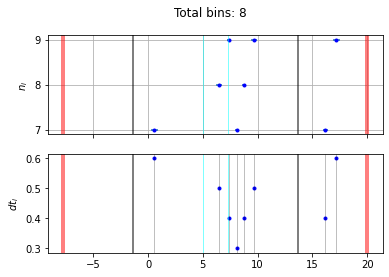

In [34]:
corr_s.gen_times(dt0=0.2, ndtmax=3, nbinsmin=6)
corr_s.plot_times(rug=True)

/Users/juan/miniconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 256 is greater than input length  = 14, using nperseg = 14
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/juan/miniconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 256 is greater than input length  = 17, using nperseg = 17
  warnings.warn('nperseg = {0:d} is greater than input length '
<ipython-input-35-ccc0981be9f5>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


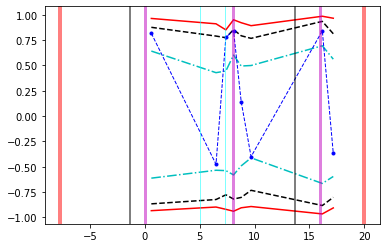

In [35]:
corr_s.gen_synth(400)
corr_s.gen_corr()
fig, ax = plt.subplots()
corr_s.plot_corr()
vertlines(8,0,1,0)
vertlines(16,0,1,0)
vertlines(0,0,1,0)
fig.show()

Which is as expected, but uglier.

We can also repeat but using **numpy's correlation function with interpolated signals**. The procedure is the same but times are manually sets as follows.

In [36]:
sig1_s = mutis.Signal(t1_s, s1_s, 'lc_gen_psd')
sig2_s = mutis.Signal(t2_s, s2_s, 'lc_gen_psd')
corr_s = mutis.Correlation(sig1_s,sig2_s,'numpy')

In [37]:
corr_s.gen_times()

/Users/juan/miniconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 256 is greater than input length  = 14, using nperseg = 14
  warnings.warn('nperseg = {0:d} is greater than input length '
/Users/juan/miniconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 256 is greater than input length  = 17, using nperseg = 17
  warnings.warn('nperseg = {0:d} is greater than input length '
<ipython-input-38-ccc0981be9f5>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


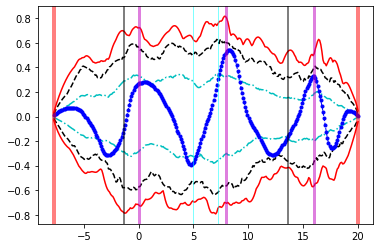

In [38]:
corr_s.gen_synth(400)
corr_s.gen_corr()
fig, ax = plt.subplots()
corr_s.plot_corr()
vertlines(8,0,1,0)
vertlines(16,0,1,0)
vertlines(0,0,1,0)
fig.show()